In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bluebike_201910.csv', index_col='date')

In [2]:
import numpy as np

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='y_true')
    
    # compute linear predictions 
    # x is a numpy array so each element gets mulitplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='y_pred (regression)')
    
    # for each data point plot the error
    for idx, (x_i, y_i) in enumerate(zip(x, y)):
        # compute predicted position
        y_pred_i = slope * x_i + intercept
        
        # plot error
        plt.plot([x_i, x_i], [y_i, y_pred_i], 
                 ls='--', lw=3, color='tab:red',
                 label='error' if idx == 0 else "")
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    
    # compute mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    
    # add title which shows model and MSE
    plt.suptitle(f'y_hat = {slope:.2f} * x + {intercept:.2f}, MSE = {mse:.3f}')
    plt.gcf().set_size_inches(10, 5)
 

# In Class Assignment 1

Given the paired observations:
```python
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3.5, 4, 5, 4.5, 6])
```
1. Find an $a_1, a_0$ (slope, intercept) which get close to the minimum MSE (guess and check via `show_fit()`)
1. Compute the MSE of the line $a_1 = 0, a_0 =$ `np.mean(y)` by hand
    - stuck? skip to the next part and come back to this computation
1. Verify your answer using `show_fit()`
1. This computation feels oddly familiar ... can you identify where we've seen it before?

Use the `show_fit()` function to try and find $a_1, a_0$ which  MSE is the smallest in the following dataset:

In [3]:
import numpy as np
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3.5, 4, 5, 4.5, 6])

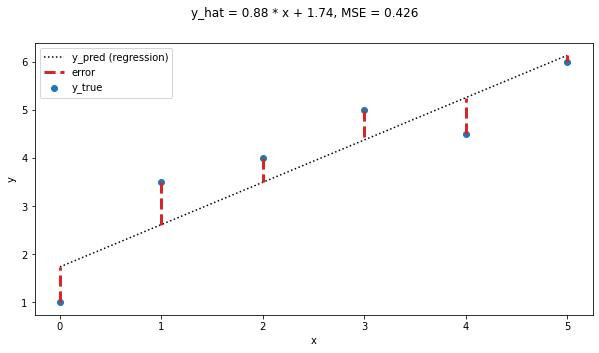

In [4]:
show_fit(x, y, slope = 0.88, intercept=1.74)

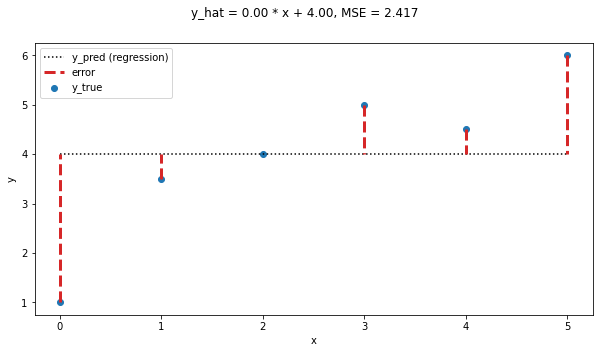

In [5]:
# verifying MSE
show_fit(x, y, slope=0, intercept=np.mean(y))

In [6]:
y_pred = x * 0 + np.mean(y)
error = y_pred - y
print(error)

[ 3.   0.5  0.  -1.  -0.5 -2. ]


In [7]:
error_sq = error ** 2
mse = np.mean(error_sq)
print(mse)

2.4166666666666665


In [8]:
# same as variance
np.var(y)

2.4166666666666665

# In Class Assignment 2

Predict y=`trip_count` from x=`temp` by ...
1. `.fit()`ing a LinearRegression to predict y from x
1. visually inspect your results using `show_fit()`
1. store the following values in a new dataframe `df_regress` (see table immediately below)
    - slope 
    - intercept
    - mse
    - r2
1. Repeat the three steps above for each new x value below.  (Use a loop)
    - x=`wind`
    - x=`rain`
    - x=`temp_c` (temperature in celsius)
        - `temp_c` = (`temp` - 32) / 1.8
        
Your final `df_regress` should look similar to below:

|        |       r2 |          mse |        slope |    intercept |
|-------:|---------:|-------------:|-------------:|-------------:|
|   temp | 0.150487 | 3.548955e+06 |   144.646765 |  1157.497714 |
| temp_c | 0.150487 | 3.548955e+06 |   260.364178 |  5786.194210 |
|   wind | 0.137007 | 3.605272e+06 |  -119.156711 | 11469.348993 |
|   rain | 0.271195 | 3.044684e+06 | -2224.622727 | 10644.350000 |
    
Using the results above, answer the following questions
1. Which of the four features, `temp`, `wind`, `rain` or `temp_c` best predicts changes in `trip_count`?  
1. Explain, to a non-technical expert, the meaning of each value in the slope column above
    - i.e. if "slope" of "temp" is 144.64, what does this mean?

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_bike = pd.read_csv('bluebike_201910.csv')

df_bike.head()

,date,trip_count,temp,wind,rain
0,2019-10-01,12183,69,13,0
1,2019-10-02,9071,66,11,1
2,2019-10-03,11496,54,9,0
3,2019-10-04,11767,60,16,0
4,2019-10-05,9315,56,9,0


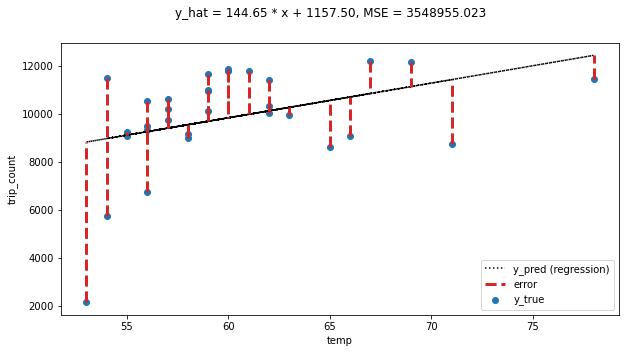

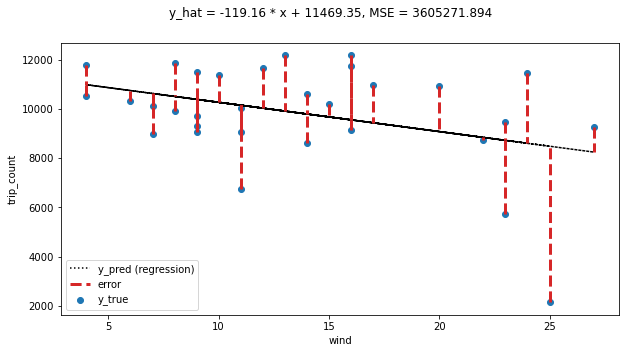

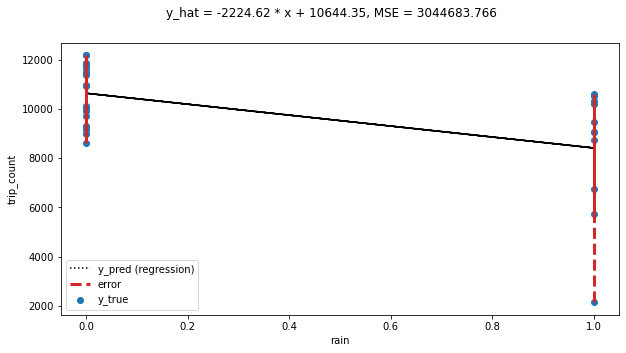

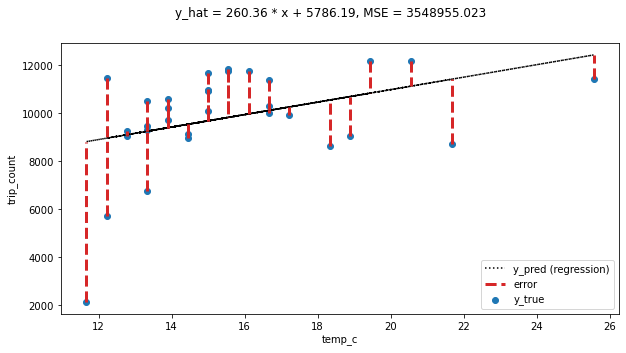

In [10]:
# convert temp to c
df_bike['temp_c'] = (df_bike['temp'] - 32) / 1.8 

# initialize empty table of regression stats
df_regress = pd.DataFrame()

# initalize regression object
reg = LinearRegression()

# get target variable
y = df_bike['trip_count'].values

x_feat = df_bike.columns[2:]


for feature in x_feat:
    # get x feature
    x = df_bike.loc[:, feature].values.reshape(-1,1)
    
    # fit regression
    reg.fit(x, y)
    
    # observing regression
    m = reg.coef_[0]
    b = reg.intercept_
    show_fit(x, y, slope = m, intercept = b)
    plt.xlabel(feature)
    plt.ylabel('trip_count')
    
    # make a prediction
    y_pred = reg.predict(x)
    
    # store regression stats
    df_regress.loc[feature, 'r2'] = r2_score(y_true = y, y_pred = y_pred)
    df_regress.loc[feature, 'mse'] = get_mse(y_pred, y)
    df_regress.loc[feature, 'slope'] = reg.coef_[0]
    df_regress.loc[feature, 'intercept'] = reg.intercept_
    
    

In [11]:
df_regress

,r2,mse,slope,intercept
temp,0.150487,3.548955e+06,144.646765,1157.497714
wind,0.137007,3.605272e+06,-119.156711,11469.348993
rain,0.271195,3.044684e+06,-2224.622727,10644.350000
temp_c,0.150487,3.548955e+06,260.364178,5786.194210
